## **Dengue**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
url_train='dengue_features_train.csv'
url_test='dengue_features_test.csv'
sub='submission_format.csv'
label_sales='dengue_labels_train.csv'
train=pd.read_csv(url_train,sep=',')
test=pd.read_csv(url_test,sep=',')
sub=pd.read_csv(sub,sep=',')
labels=pd.read_csv(label_sales,sep=',')

In [3]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
print(labels.shape)
print(train.shape)

(1456, 4)
(1456, 24)


In [5]:
train['total_cases']=labels['total_cases']
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [6]:
# Variables nulos
train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
print(train.shape)
print(train.isnull().sum().sum())

(1456, 25)
548


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [9]:
train['week_start_date'] = pd.to_datetime(train['week_start_date'], format='%Y-%m-%d')

In [10]:
test['week_start_date'] = pd.to_datetime(test['week_start_date'], format='%Y-%m-%d')

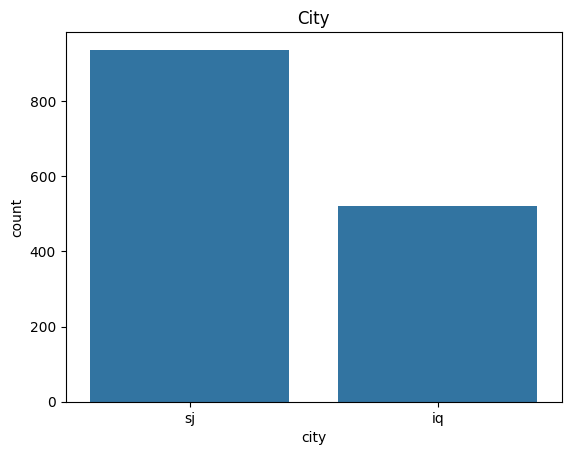

In [11]:
#cat=train.select_dtypes(include='object').columns
sns.countplot(data=train,x='city')
plt.title('City')
plt.show()

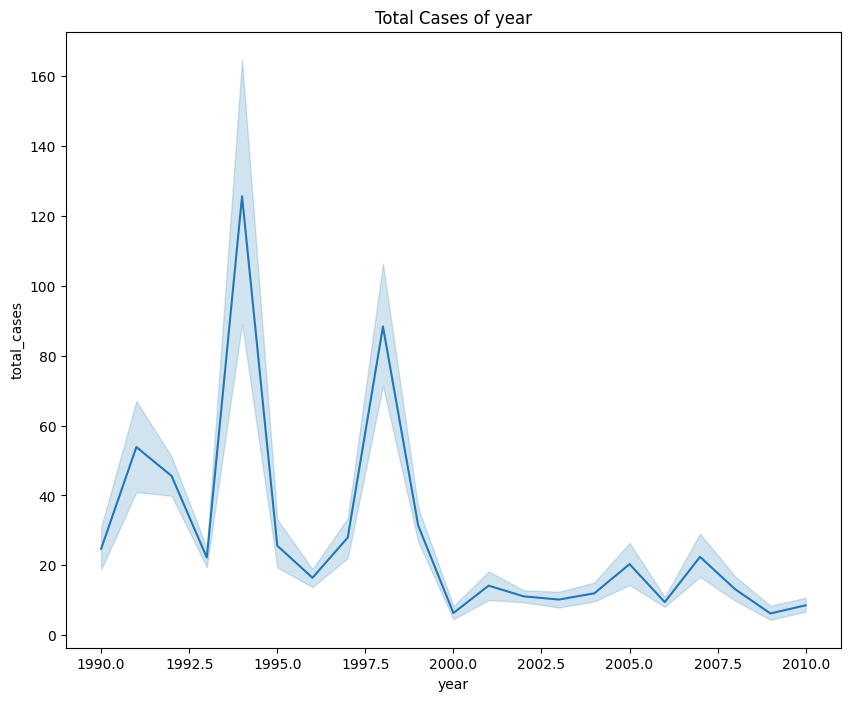

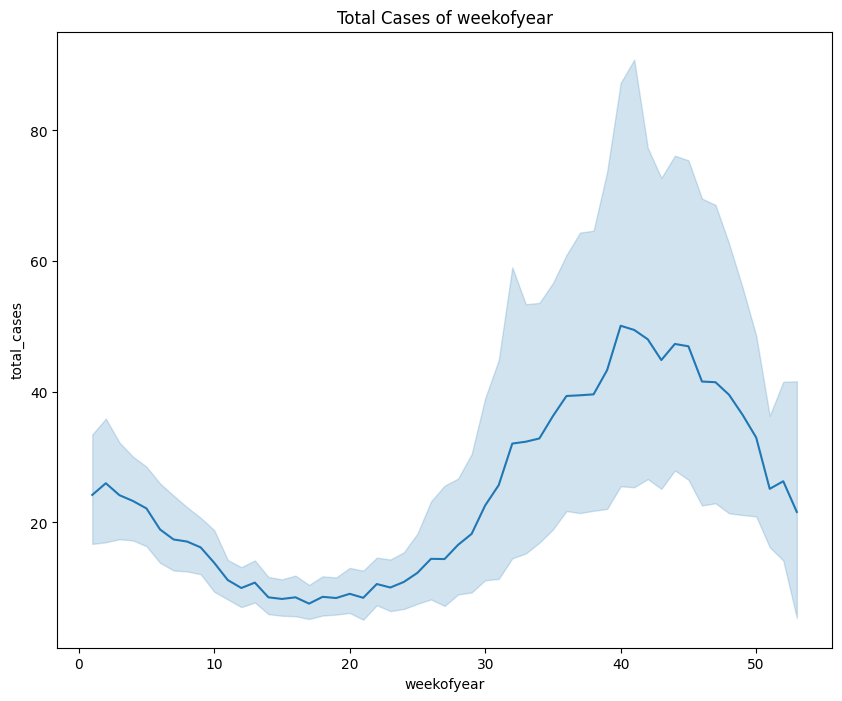

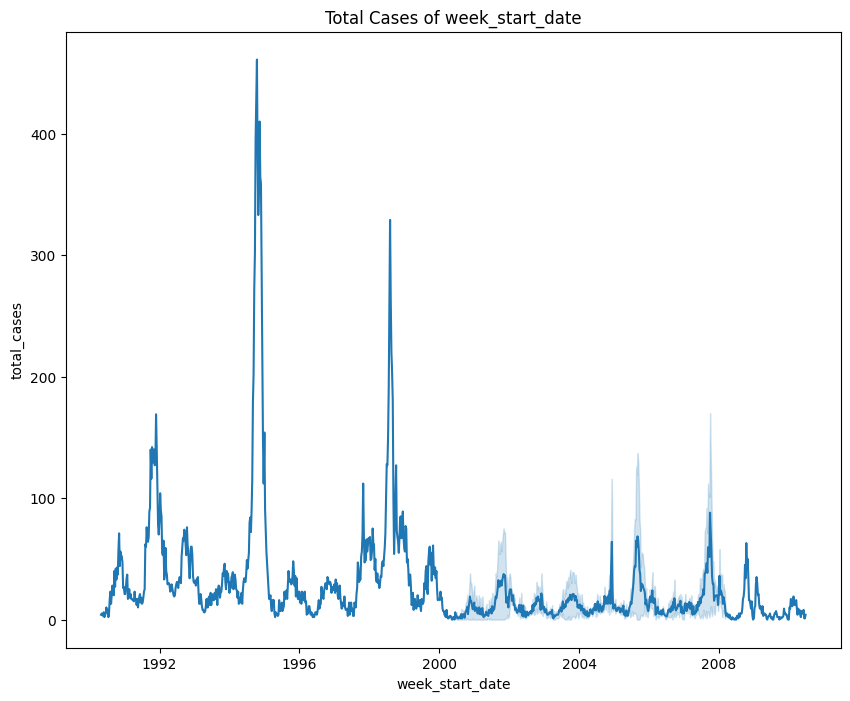

In [12]:
# Date 
tiempo=['year','weekofyear','week_start_date']
for i in tiempo:
    plt.figure(figsize=(10,8))
    sns.lineplot(data=train,x=i,y='total_cases')
    plt.title(f'Total Cases of {i}')
    plt.show()

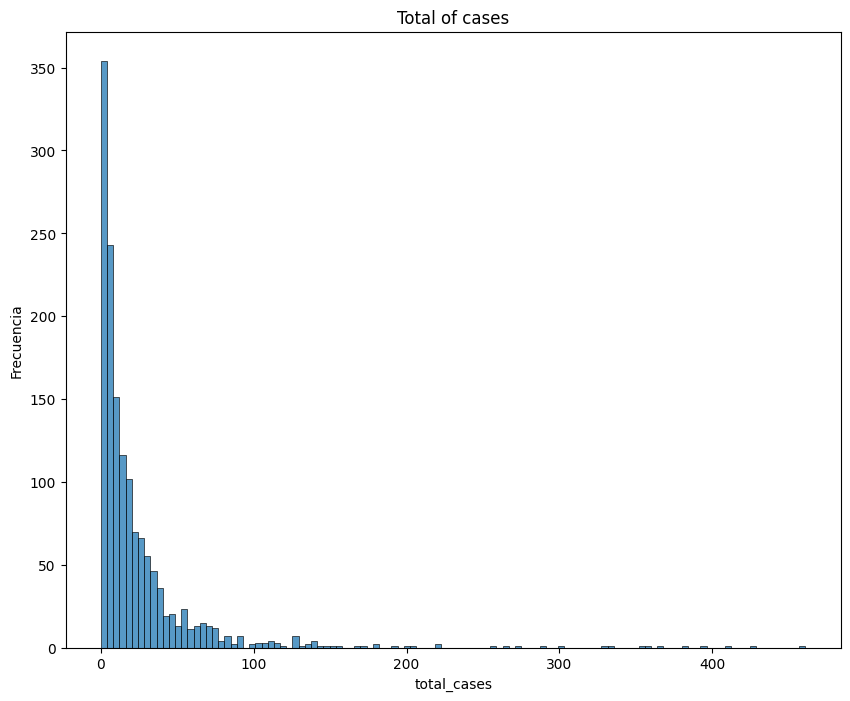

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(data=train,x='total_cases')
plt.title('Total of cases')
plt.ylabel('Frecuencia')
plt.show()

In [14]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


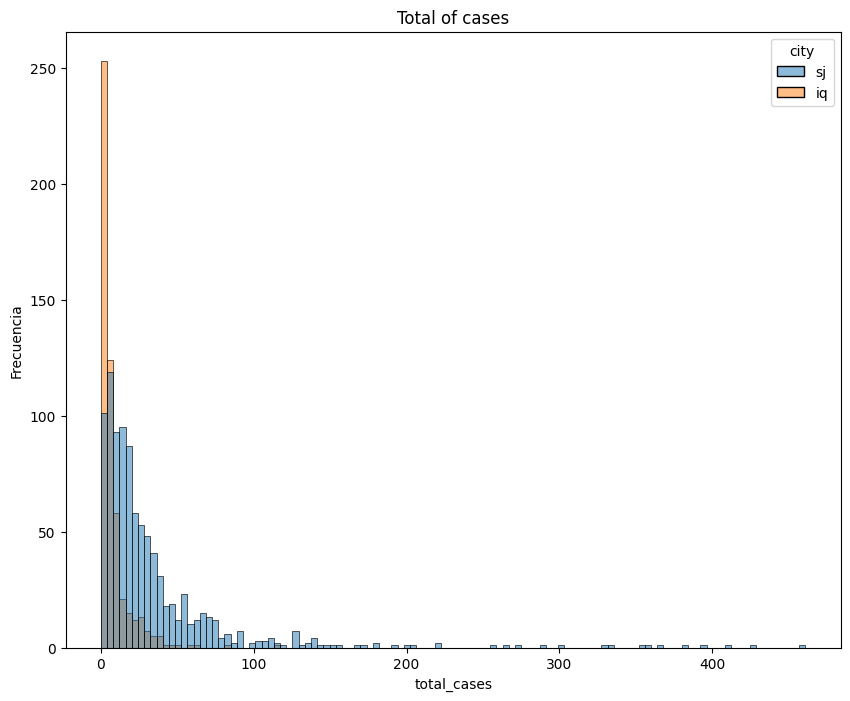

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data=train,x='total_cases',hue='city')
plt.title('Total of cases')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
train['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

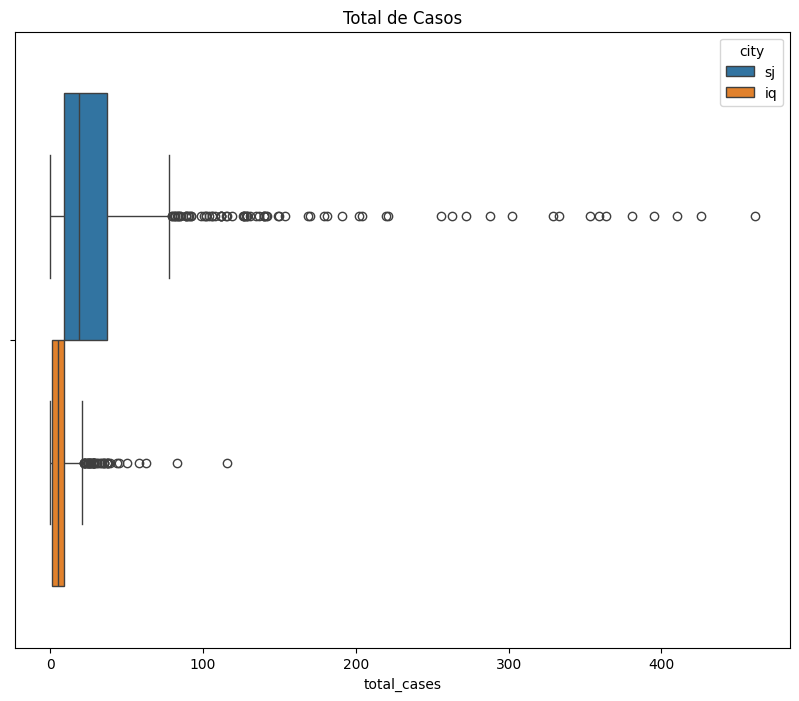

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train,x='total_cases',hue='city')
plt.title('Total de Casos')
plt.show()

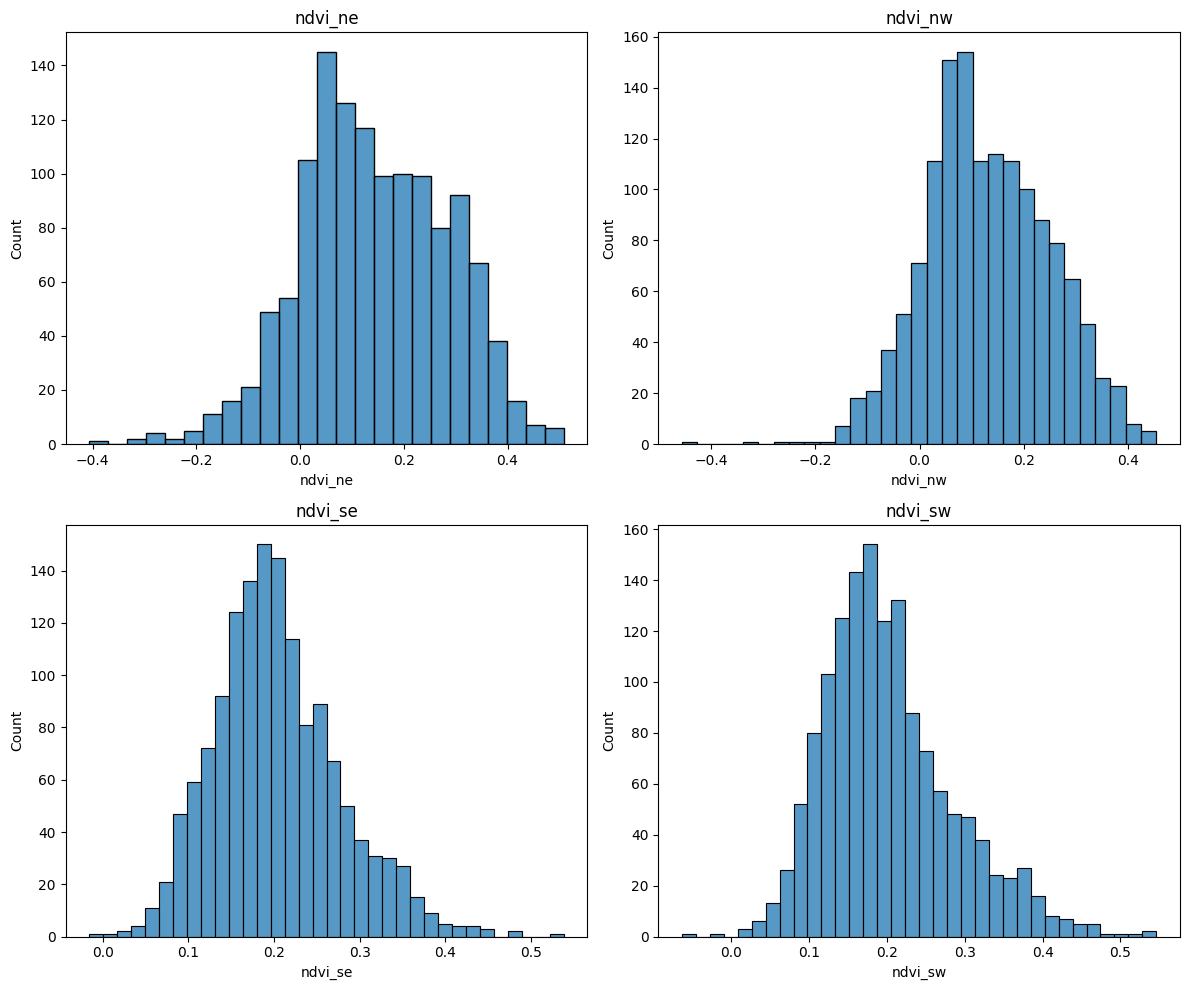

In [18]:
ndvi=['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterar sobre las variables y los ejes
for ax, feature in zip(axes.ravel(), ndvi):
    sns.histplot(data=train, x=feature, ax=ax)
    ax.set_title(feature)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

In [19]:
# Seleccionar las columnas con los valores nulos a imputar
ndvi = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

# Crear una copia del dataset solo con las columnas ndvi
ndvi_data = train[ndvi]

# Inicializar el imputador con KNN (usar k=5 vecinos por defecto)
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar los valores nulos
ndvi_imputed = knn_imputer.fit_transform(ndvi_data)

# Reemplazar las columnas originales en el dataset
train[ndvi] = pd.DataFrame(ndvi_imputed, columns=ndvi)

print("Valores nulos después de KNN:", train[ndvi].isnull().sum())


Valores nulos después de KNN: ndvi_ne    0
ndvi_nw    0
ndvi_se    0
ndvi_sw    0
dtype: int64


In [20]:
numerical=['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']

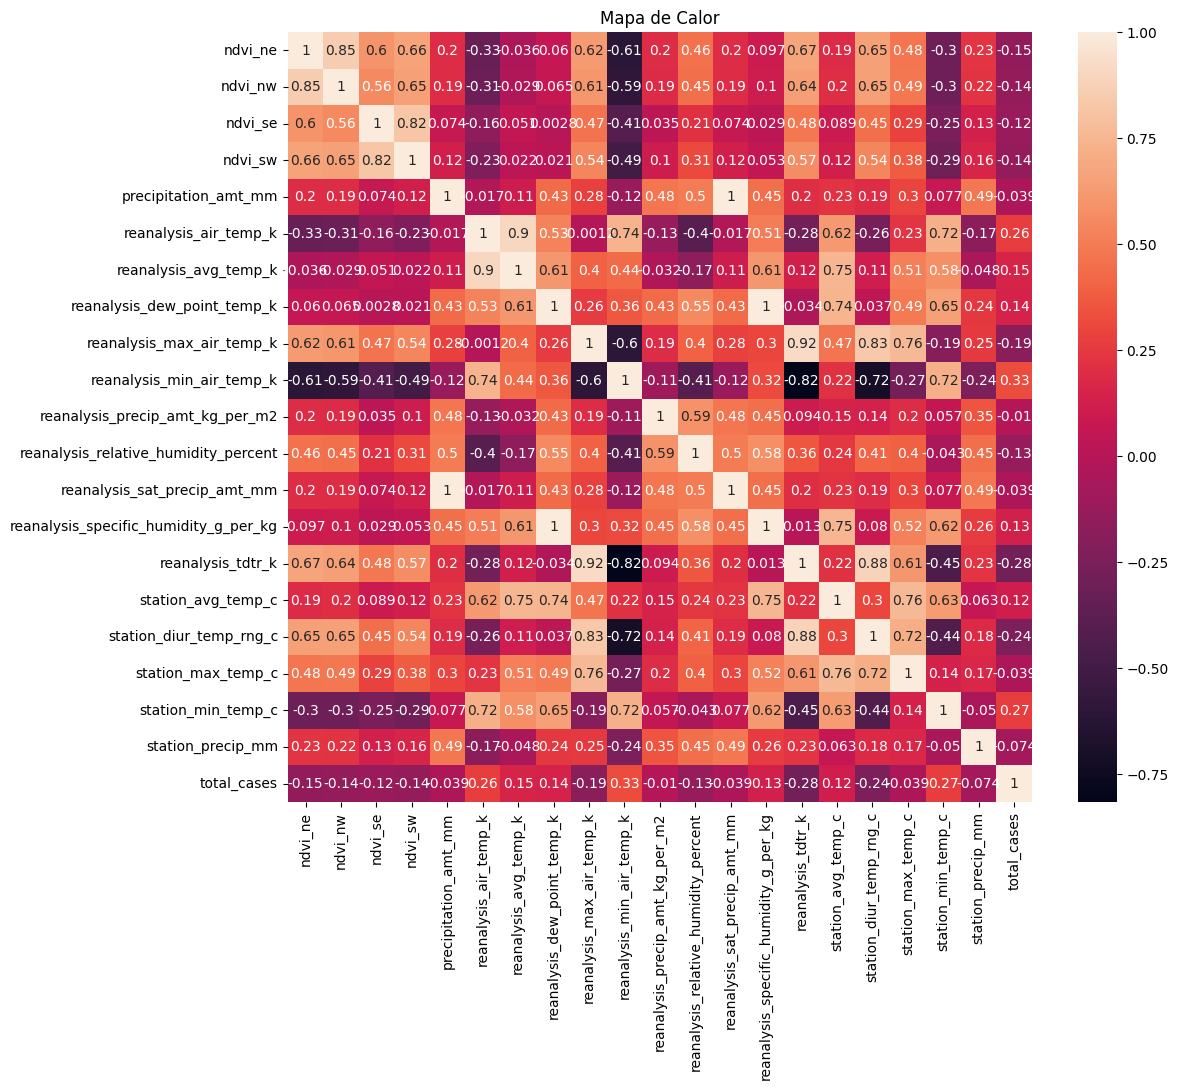

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(train[numerical].corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

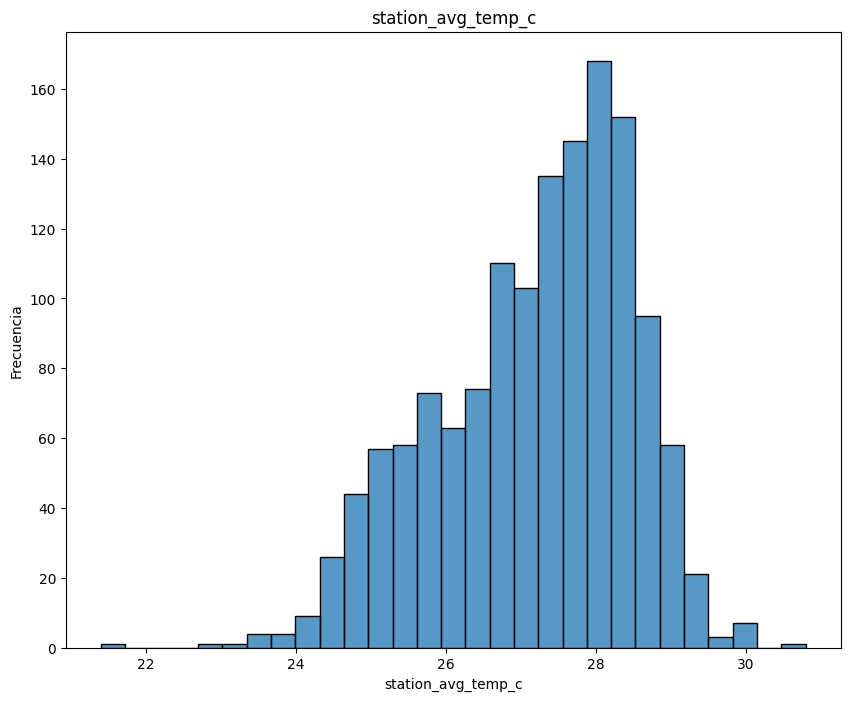

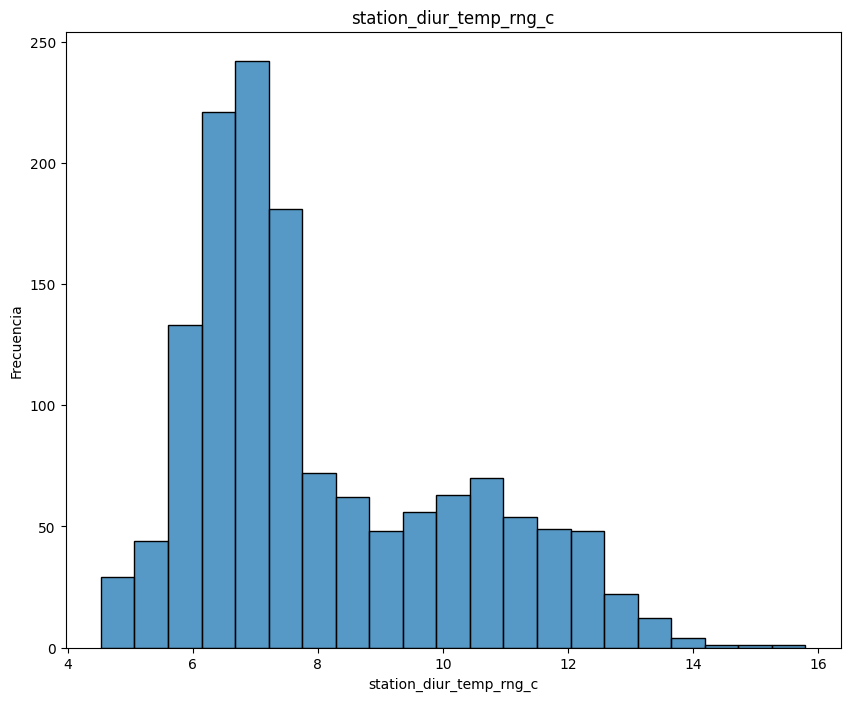

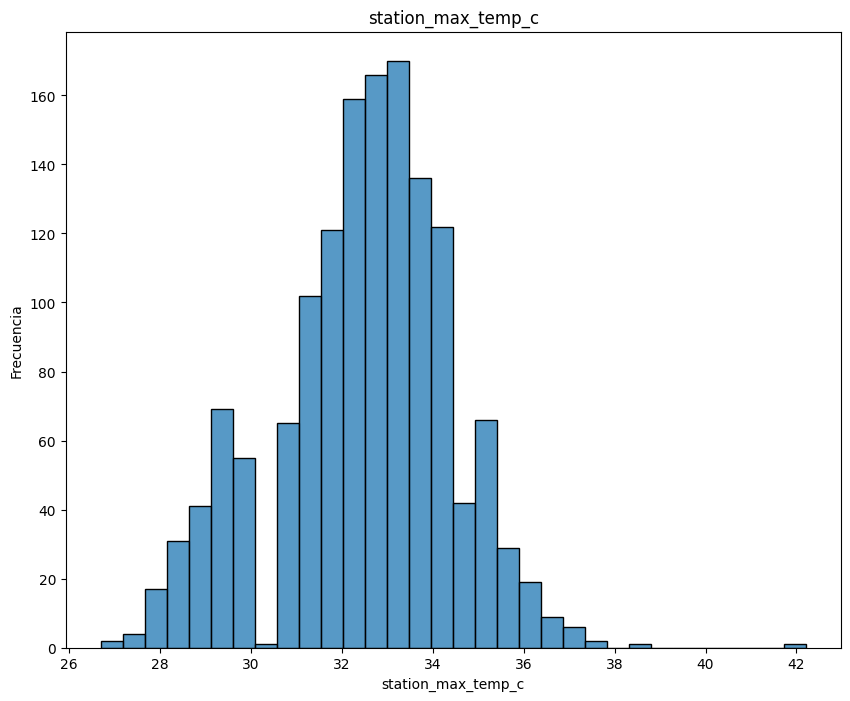

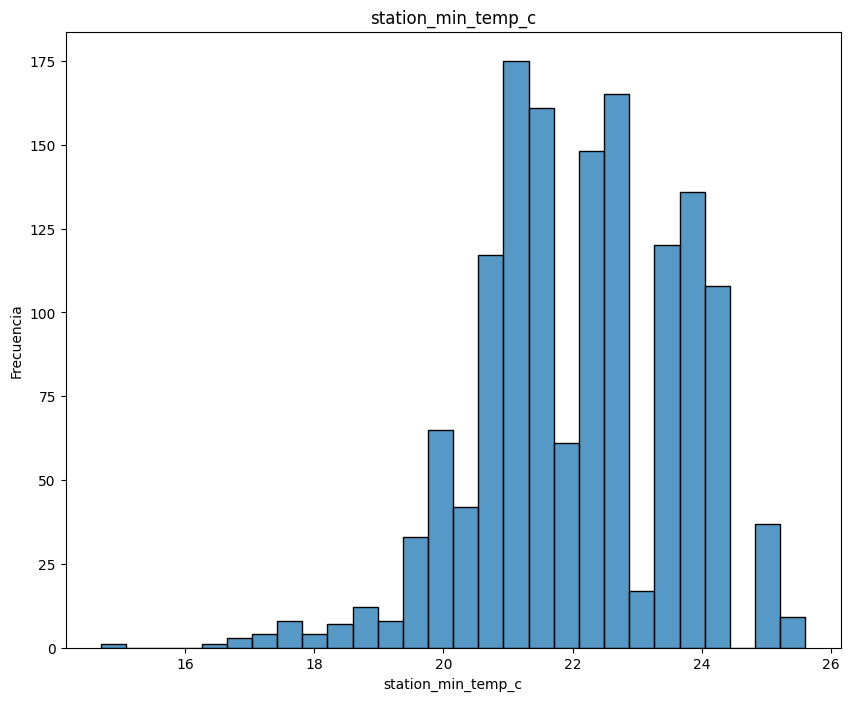

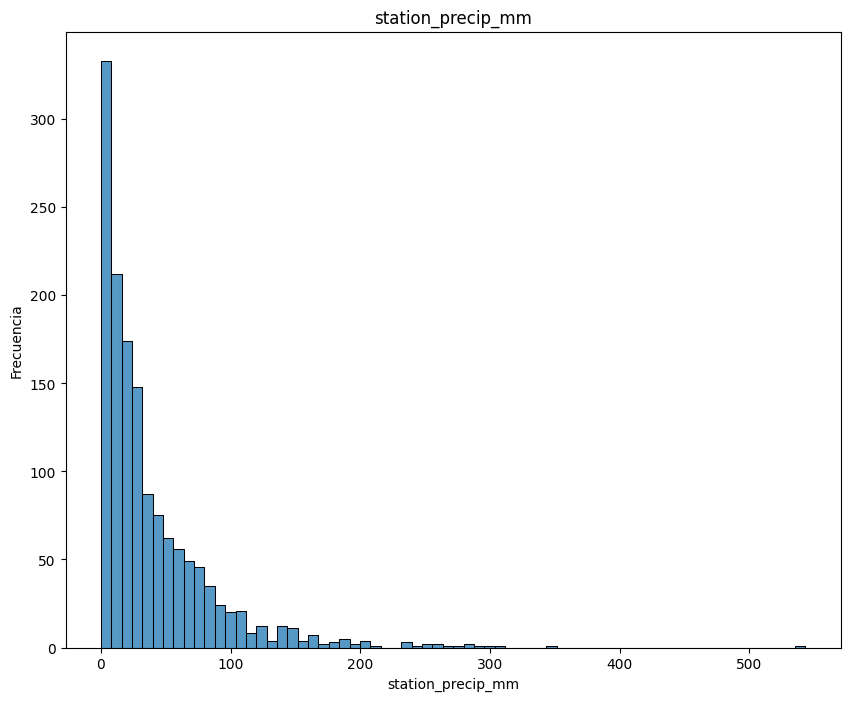

In [22]:
station=['station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm']
for i in station:
    plt.figure(figsize=(10,8))
    sns.histplot(data=train,x=i)
    plt.title(i,fontsize=12)
    plt.ylabel('Frecuencia')
    plt.show()

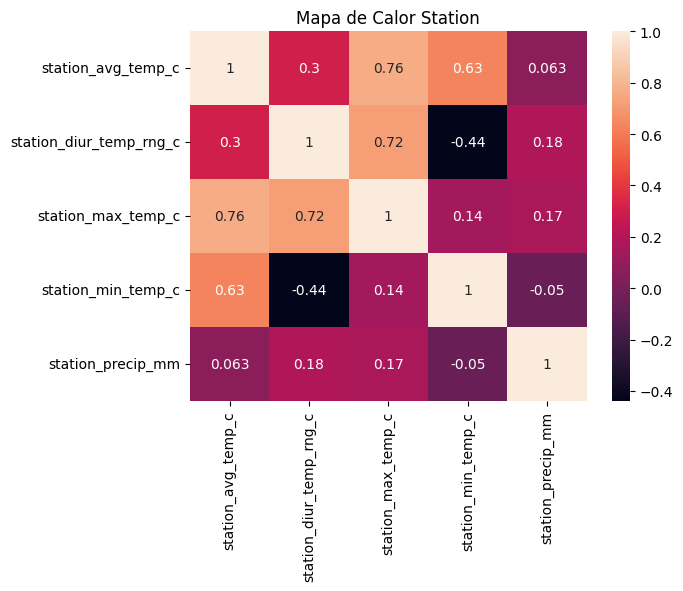

In [23]:
sns.heatmap(train[station].corr(),annot=True)
plt.title('Mapa de Calor Station')
plt.show()

In [24]:
# Crear una copia del dataset solo con las columnas ndvi
station_data = train[station]

# Inicializar el imputador con KNN (usar k=5 vecinos por defecto)
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar los valores nulos
station_imputed = knn_imputer.fit_transform(station_data)

# Reemplazar las columnas originales en el dataset
train[station] = pd.DataFrame(station_imputed, columns=station)

print("Valores nulos después de KNN:", train[station].isnull().sum())

Valores nulos después de KNN: station_avg_temp_c         0
station_diur_temp_rng_c    0
station_max_temp_c         0
station_min_temp_c         0
station_precip_mm          0
dtype: int64


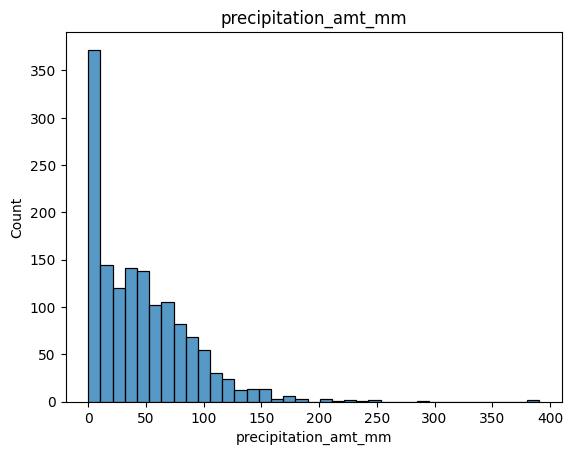

In [25]:
sns.histplot(data=train,x='precipitation_amt_mm')
plt.title('precipitation_amt_mm')
plt.show()

In [26]:
train.dropna(inplace=True)
train.isnull().sum().sum()

0

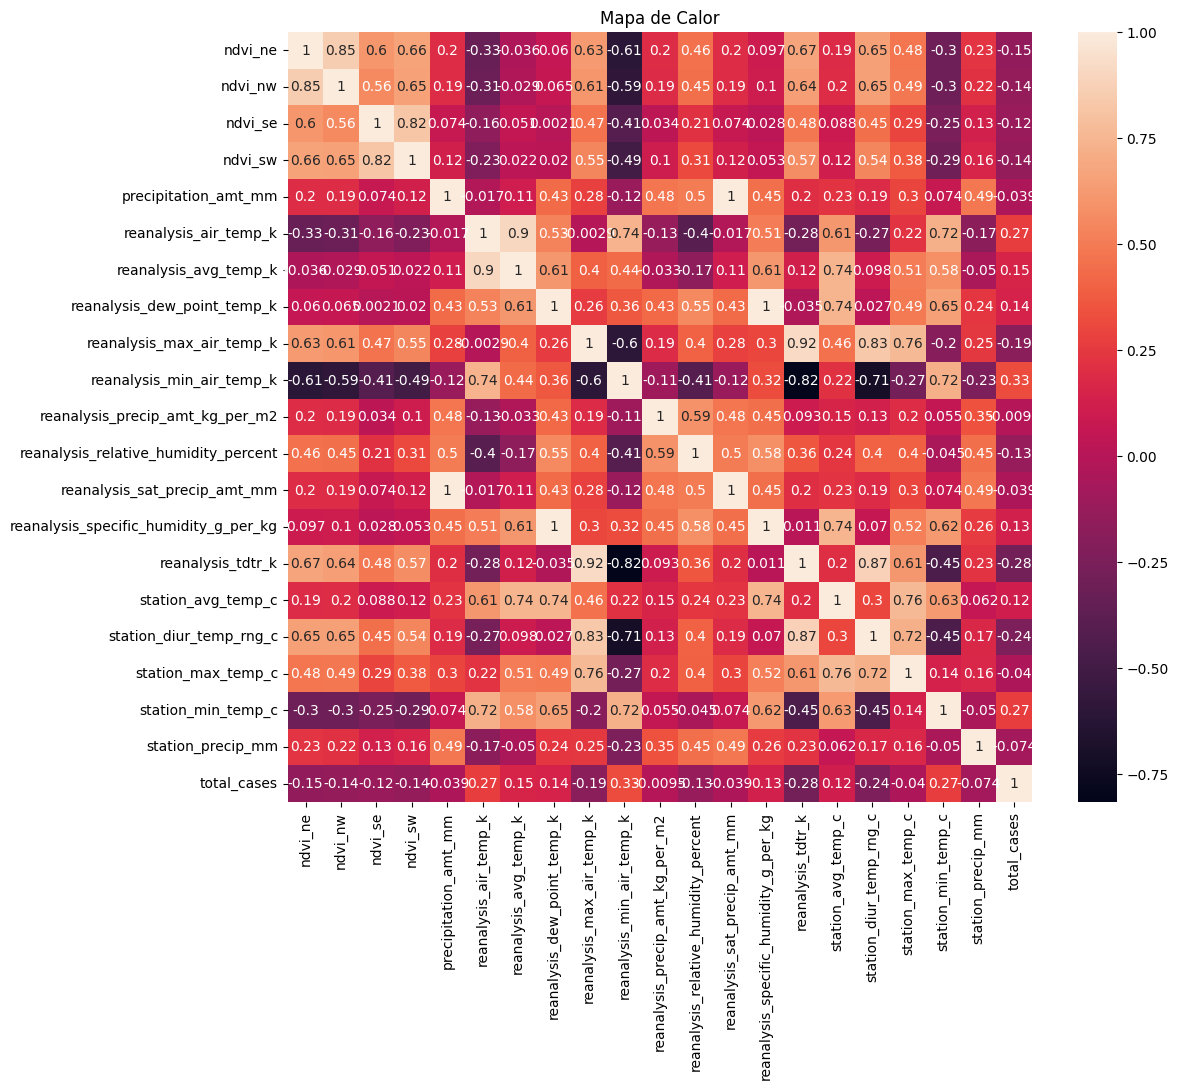

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(train[numerical].corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

In [28]:
train.drop(columns=['reanalysis_min_air_temp_k'],inplace=True)

In [29]:
test.drop(columns=['reanalysis_min_air_temp_k'],inplace=True)

In [30]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [31]:
le=LabelEncoder()
train['city']=le.fit_transform(train['city'])
test['city']=le.fit_transform(test['city'])

In [32]:
train['Day']=train['week_start_date'].dt.day
train['Month']=train['week_start_date'].dt.month
test['Day']=test['week_start_date'].dt.day
test['Month']=test['week_start_date'].dt.month

In [33]:
train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'Day',
       'Month'],
      dtype='object')

In [34]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Day,Month
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,30,4
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,7,5
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,14,5
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,21,5
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,28,5


In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
y=train['total_cases']
X=train.drop(columns=['total_cases','week_start_date'],axis=1)

In [100]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [78]:
parametros = {
    'objective': ['regression'],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [200]:
# Crear un objeto LGBMRegressor
modelo = lgb.LGBMRegressor(objective='regression', num_leaves=200, learning_rate=0.05,
                           boosting_type='dart',n_estimators=1000,reg_alpha=6.25,reg_lambda=0.0025,
                           max_depth=100,min_child_weight=0.08,subsample=0.8,colsample_bytree=0.8,
                           min_child_samples=5,random_state=42,metric='rmse',
                           subsample_freq=3)

# Entrenar el modelo
modelo.fit(X_train, y_train,eval_metric='mean_absolute_error')

# Realizar predicciones
predicciones = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
print(f'MSE: {mse:.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4427
[LightGBM] [Info] Number of data points in the train set: 1154, number of used features: 24
[LightGBM] [Info] Start training from score 24.088388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [201]:
# Importar la función de error absoluto medio
from sklearn.metrics import mean_absolute_error
# Evaluar el modelo
mae = mean_absolute_error(y_test, predicciones)
print(f'MAE: {mae:.2f}')

MAE: 13.62


In [202]:
r2 = r2_score(y_test, predicciones)
round(r2*100,2)

67.3

In [203]:
df_new=X_test[['year','city']]
df_new['Real']=y_test
df_new['Pred']=predicciones
df_new.head()

,year,city,Real,Pred
419,1998,1,48,43.689798
321,1996,1,4,14.365410
1043,2002,0,5,5.184578
65,1991,1,25,29.953430
1033,2002,0,10,6.057902


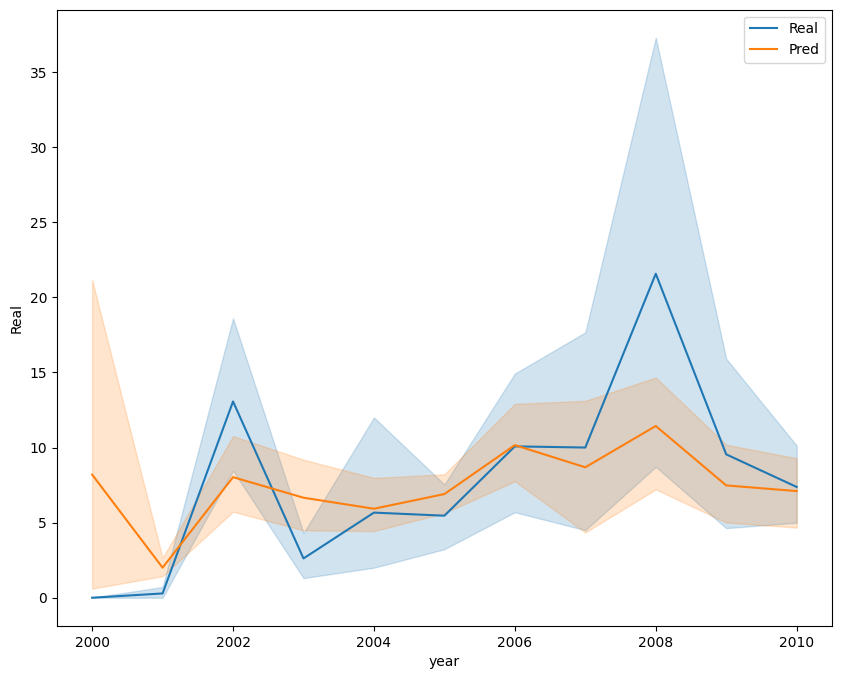

In [204]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_new[df_new['city'] == 0],x='year',y='Real',label='Real')
sns.lineplot(data=df_new[df_new['city'] == 0],x='year',y='Pred',label='Pred')
plt.legend()
plt.show()

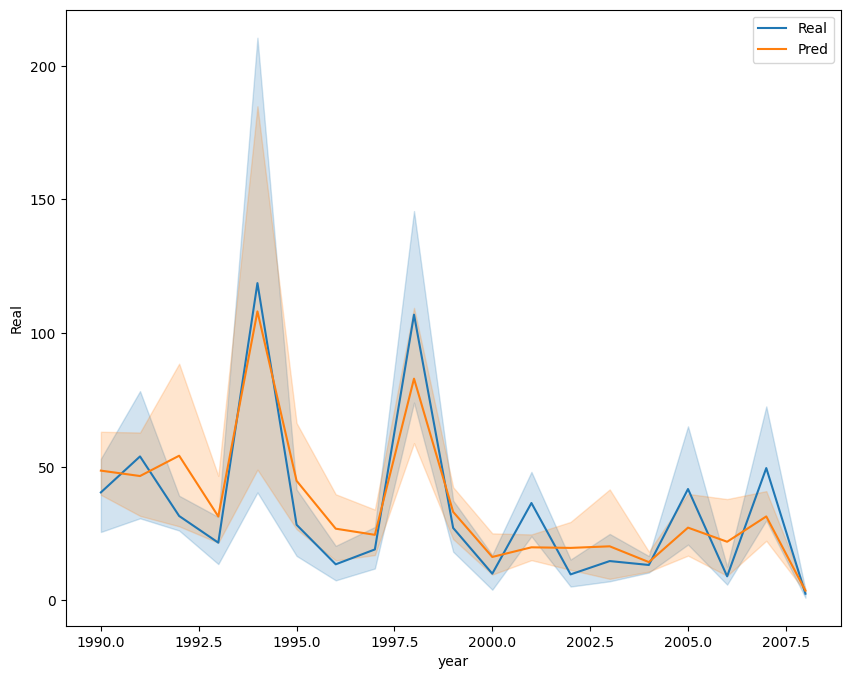

In [205]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_new[df_new['city'] == 1],x='year',y='Real',label='Real')
sns.lineplot(data=df_new[df_new['city'] == 1],x='year',y='Pred',label='Pred')
plt.legend()
plt.show()